In [172]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [174]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('creditcard.csv')

In [175]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [176]:
credit_card_data.shape

(284807, 31)

In [177]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [178]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [179]:
credit_card_data.shape

(284807, 31)

In [180]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [181]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

THIS DATA IS HIGHLY UNBALANCED 
0-->Normal Transaction
1--->Fraudulent Transaction

In [183]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [184]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [190]:
# statistical measures of the data
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [196]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

EDA

In [297]:
# Basic overview
print("Legit Transactions:\n", legit.describe())
print("\nFraudulent Transactions:\n", fraud.describe())


Legit Transactions:
                 Time             V1             V2             V3  \
count  284315.000000  284315.000000  284315.000000  284315.000000   
mean    94838.202258       0.008258      -0.006271       0.012171   
std     47484.015786       1.929814       1.636146       1.459429   
min         0.000000     -56.407510     -72.715728     -48.325589   
25%     54230.000000      -0.917544      -0.599473      -0.884541   
50%     84711.000000       0.020023       0.064070       0.182158   
75%    139333.000000       1.316218       0.800446       1.028372   
max    172792.000000       2.454930      18.902453       9.382558   

                  V4             V5             V6             V7  \
count  284315.000000  284315.000000  284315.000000  284315.000000   
mean       -0.007860       0.005453       0.002419       0.009637   
std         1.399333       1.356952       1.329913       1.178812   
min        -5.683171    -113.743307     -26.160506     -31.764946   
25%        -

In [299]:
print("Total Legit Transactions:", len(legit))
print("Total Fraudulent Transactions:", len(fraud))
print("Fraud Percentage:", (len(fraud)/len(credit_card_data))*100, "%")


Total Legit Transactions: 284315
Total Fraudulent Transactions: 492
Fraud Percentage: 0.1727485630620034 %


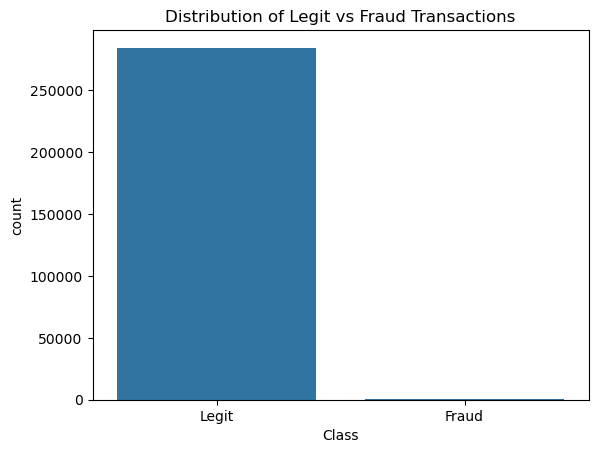

In [301]:
sns.countplot(data=credit_card_data, x='Class')
plt.title("Distribution of Legit vs Fraud Transactions")
plt.xticks([0, 1], ['Legit', 'Fraud'])
plt.show()


C:\Users\gunak\AppData\Local\Temp\ipykernel_25836\2688800938.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=labels, y=amount_sum.values, palette=['green', 'red'])


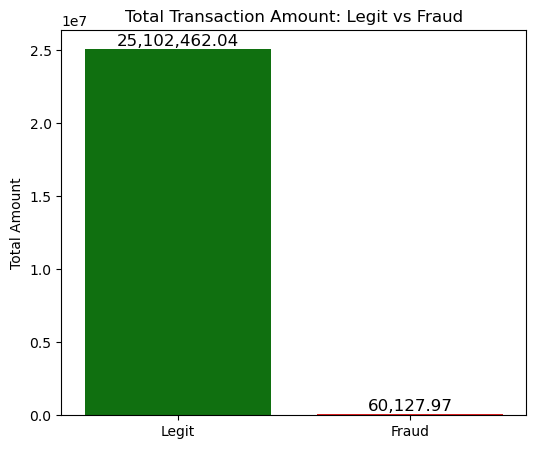

In [317]:
# Group by class and sum the amount
amount_sum = credit_card_data.groupby('Class')['Amount'].sum()
labels = ['Legit', 'Fraud']

# Plot
plt.figure(figsize=(6,5))
ax = sns.barplot(x=labels, y=amount_sum.values, palette=['green', 'red'])

plt.title("Total Transaction Amount: Legit vs Fraud")
plt.ylabel("Total Amount")

# Add value labels
for i, val in enumerate(amount_sum.values):
    ax.text(i, val + 1000, f'{val:,.2f}', ha='center', va='bottom', fontsize=12)

plt.show()


C:\Users\gunak\AppData\Local\Temp\ipykernel_25836\1927125095.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=labels, y=amount_mean.values, palette=['green', 'red'])


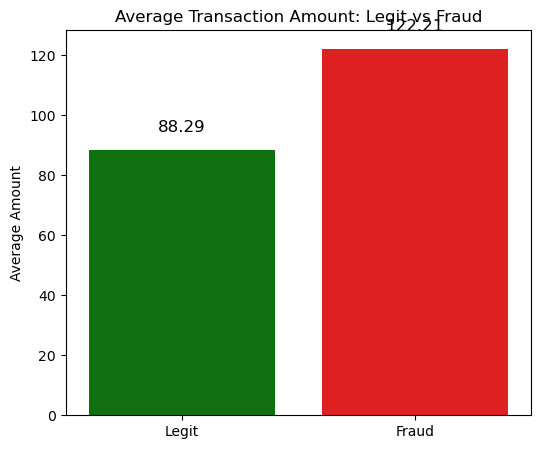

In [319]:
# Group by class and mean amount
amount_mean = credit_card_data.groupby('Class')['Amount'].mean()
# Plot
plt.figure(figsize=(6,5))
ax = sns.barplot(x=labels, y=amount_mean.values, palette=['green', 'red'])

plt.title("Average Transaction Amount: Legit vs Fraud")
plt.ylabel("Average Amount")

# Add value labels
for i, val in enumerate(amount_mean.values):
    ax.text(i, val + 5, f'{val:,.2f}', ha='center', va='bottom', fontsize=12)

plt.show()


C:\Users\gunak\AppData\Local\Temp\ipykernel_25836\1296373765.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Legit', 'Fraud'], y=amount_mean.values, palette=['green', 'red'])


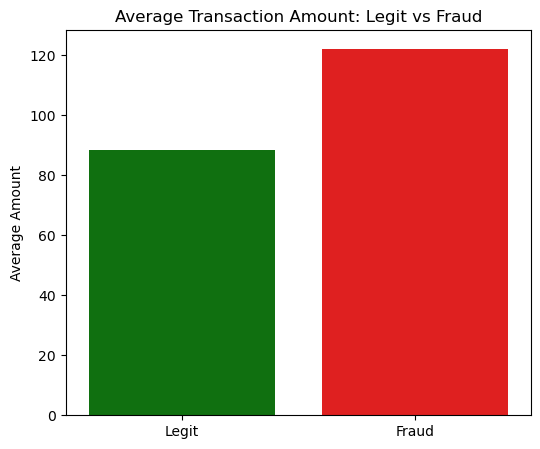

In [315]:
# Group by class and calculate mean amount
amount_mean = credit_card_data.groupby('Class')['Amount'].mean()

# Plot
plt.figure(figsize=(6,5))
sns.barplot(x=['Legit', 'Fraud'], y=amount_mean.values, palette=['green', 'red'])
plt.title("Average Transaction Amount: Legit vs Fraud")
plt.ylabel("Average Amount")
plt.show()


In [198]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


Under-Sampling
Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions
Number of Fraudulent Transactions --> 492

In [202]:
legit_sample = legit.sample(n=492)

In [204]:
legit_sample

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
276401,167069.0,-0.527368,1.482002,-2.119548,-1.170608,4.125515,2.827146,1.166812,0.673636,-1.290886,...,-0.063435,-0.177107,-0.687044,0.539581,1.139411,0.941244,-0.016952,0.079282,0.76,0
252193,155689.0,0.138250,-0.654974,-1.730398,-2.928311,2.502516,3.140831,-0.132257,0.603836,-2.939309,...,0.096054,0.619752,-0.155358,0.743094,-0.051103,0.228084,0.169082,0.165069,35.94,0
992,750.0,-1.615439,0.403428,1.988101,-3.421195,0.213596,-0.071616,0.543998,0.004862,1.150273,...,0.025353,0.234906,-0.231167,-0.265165,0.257302,-0.345013,-0.426659,-0.061492,15.37,0
87691,61796.0,0.888042,-0.247317,1.236637,1.437646,-1.128460,-0.555786,-0.258500,-0.080872,0.283426,...,0.219780,0.406020,-0.099009,0.733316,0.278422,-0.399154,0.043206,0.069960,144.00,0
32162,36666.0,0.384490,-2.878784,-0.566511,-0.710221,-1.984027,-0.846792,0.056902,-0.425561,-1.774141,...,0.141110,-0.456942,-0.599612,0.412477,0.436625,-0.124760,-0.100558,0.111007,607.15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106627,70044.0,-0.853851,0.552829,1.791775,-0.380160,0.500297,-1.240572,0.586198,-0.080437,-0.481314,...,-0.141397,-0.625831,-0.007286,0.357046,-0.142823,-0.057620,0.022207,0.111870,1.29,0
181154,124850.0,2.015745,-1.060969,-1.182883,-0.830083,-0.615193,-0.648351,-0.433433,-0.277824,-0.341934,...,0.253685,0.578088,0.080772,0.788467,-0.037058,-0.209111,-0.034484,-0.030645,111.90,0
105540,69578.0,-0.214588,0.306655,1.788223,-0.425405,-0.903397,-0.526494,-0.236112,0.031357,-1.697808,...,0.031159,-0.136073,0.034564,0.503216,-0.586921,-0.344711,-0.003464,0.128918,2.95,0
4891,4421.0,-0.404871,0.962880,2.024032,0.538593,0.086829,-0.047611,0.552897,-0.399335,1.374024,...,-0.442756,-0.741257,-0.043124,0.015863,-0.589161,0.139594,-0.331127,-0.083724,11.99,0


In [206]:
legit_sample.shape

(492, 31)

CONCATENATING TWO DATAFRAMES

In [209]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [211]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
276401,167069.0,-0.527368,1.482002,-2.119548,-1.170608,4.125515,2.827146,1.166812,0.673636,-1.290886,...,-0.063435,-0.177107,-0.687044,0.539581,1.139411,0.941244,-0.016952,0.079282,0.76,0
252193,155689.0,0.138250,-0.654974,-1.730398,-2.928311,2.502516,3.140831,-0.132257,0.603836,-2.939309,...,0.096054,0.619752,-0.155358,0.743094,-0.051103,0.228084,0.169082,0.165069,35.94,0
992,750.0,-1.615439,0.403428,1.988101,-3.421195,0.213596,-0.071616,0.543998,0.004862,1.150273,...,0.025353,0.234906,-0.231167,-0.265165,0.257302,-0.345013,-0.426659,-0.061492,15.37,0
87691,61796.0,0.888042,-0.247317,1.236637,1.437646,-1.128460,-0.555786,-0.258500,-0.080872,0.283426,...,0.219780,0.406020,-0.099009,0.733316,0.278422,-0.399154,0.043206,0.069960,144.00,0
32162,36666.0,0.384490,-2.878784,-0.566511,-0.710221,-1.984027,-0.846792,0.056902,-0.425561,-1.774141,...,0.141110,-0.456942,-0.599612,0.412477,0.436625,-0.124760,-0.100558,0.111007,607.15,0


In [213]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [215]:
new_dataset.shape

(984, 31)

In [217]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [219]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,96666.073171,0.113584,-0.086904,0.018553,0.048656,-0.038439,0.079355,-0.022352,-0.002072,-0.047818,...,0.014105,-0.013876,0.041444,-0.002552,0.027692,0.012941,0.004840,0.028045,0.012854,100.866423
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [221]:
x = new_dataset.drop(columns='Class', axis=1)
y = new_dataset['Class']

In [223]:
print(x)

            Time        V1        V2        V3        V4        V5        V6  \
276401  167069.0 -0.527368  1.482002 -2.119548 -1.170608  4.125515  2.827146   
252193  155689.0  0.138250 -0.654974 -1.730398 -2.928311  2.502516  3.140831   
992        750.0 -1.615439  0.403428  1.988101 -3.421195  0.213596 -0.071616   
87691    61796.0  0.888042 -0.247317  1.236637  1.437646 -1.128460 -0.555786   
32162    36666.0  0.384490 -2.878784 -0.566511 -0.710221 -1.984027 -0.846792   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [225]:
x.shape

(984, 30)

In [259]:
x.head(4)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
276401,167069.0,-0.527368,1.482002,-2.119548,-1.170608,4.125515,2.827146,1.166812,0.673636,-1.290886,...,0.125127,-0.063435,-0.177107,-0.687044,0.539581,1.139411,0.941244,-0.016952,0.079282,0.76
252193,155689.0,0.138250,-0.654974,-1.730398,-2.928311,2.502516,3.140831,-0.132257,0.603836,-2.939309,...,-0.079399,0.096054,0.619752,-0.155358,0.743094,-0.051103,0.228084,0.169082,0.165069,35.94
992,750.0,-1.615439,0.403428,1.988101,-3.421195,0.213596,-0.071616,0.543998,0.004862,1.150273,...,-0.146460,0.025353,0.234906,-0.231167,-0.265165,0.257302,-0.345013,-0.426659,-0.061492,15.37
87691,61796.0,0.888042,-0.247317,1.236637,1.437646,-1.128460,-0.555786,-0.258500,-0.080872,0.283426,...,0.215459,0.219780,0.406020,-0.099009,0.733316,0.278422,-0.399154,0.043206,0.069960,144.00


In [227]:
print(y)

276401    0
252193    0
992       0
87691     0
32162     0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [229]:
y.shape

(984,)

In [231]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)

In [233]:
# Step 1: Scale the features manually
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [261]:
x_train_scaled

array([[-0.44426482,  0.28403875, -0.48295399, ...,  0.03907525,
        -0.37326894,  1.79841601],
       [ 1.55750212,  0.30006296, -0.24232925, ...,  0.23600603,
         0.15118535, -0.44645096],
       [-0.21024486,  0.1606895 , -0.27705916, ..., -0.7174509 ,
        -0.18897871, -0.16759364],
       ...,
       [ 1.10508123,  0.05444616,  0.51838236, ...,  0.36992806,
        -0.21255824, -0.44645096],
       [-0.97955842, -2.3395753 ,  1.70176632, ..., -1.40321707,
        -1.64237705, -0.31079064],
       [-0.98652062,  0.61213511, -0.6636597 , ..., -0.14877732,
        -0.10673583, -0.20478554]])

In [265]:
x_test_scaled

array([[ 1.31547869,  0.63441679, -0.093161  , ...,  0.39115134,
         0.40265839, -0.24013423],
       [ 0.72520204,  0.79436012, -0.75617242, ..., -0.14358335,
        -0.18729742,  0.00779811],
       [-0.20358891,  0.69160854, -0.71580508, ..., -0.10294355,
        -0.13341482, -0.38910662],
       ...,
       [-0.45286039,  0.08797812, -0.36222912, ...,  0.21850134,
         0.42194157,  1.55531698],
       [-0.6883912 , -0.92810879,  0.17414534, ...,  1.07260411,
         0.6917197 , -0.44714729],
       [ 1.54639526,  0.55525692, -0.9400354 , ..., -0.15156424,
        -0.00849025,  1.71203086]])

In [277]:
print(x.shape, x_train_scaled.shape, x_test_scaled.shape)

(984, 30) (787, 30) (197, 30)


In [279]:
model = LogisticRegression()

In [281]:
# training the Logistic Regression Model with Training Data
model.fit(x_train_scaled, y_train)

LogisticRegression()

In [283]:
# accuracy on training data
x_train_prediction = model.predict(x_train_scaled)

In [291]:
print(x_train_prediction)

[0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 0 1
 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0
 0 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1
 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0
 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0
 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1
 0 1 1 1 1 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0
 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1
 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 0
 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0
 1 1 0 0 0 0 0 1 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1
 1 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0
 0 0 0 1 1 0 1 0 1 1 0 0 

In [269]:
test_data_accuracy = accuracy_score(x_train_prediction, y_train)

In [271]:
print(test_data_accuracy)

0.9491740787801779


In [247]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9491740787801779
